In [23]:
import pandas as pd

# Чтение данных из файла
data = pd.read_csv('laptop_prices.csv')

# Просмотр первых строк
print(data.head())


  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [27]:

X = data.drop(columns=['Price_euros'])


In [28]:
X = pd.get_dummies(X, drop_first=True)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
from sklearn.cluster import KMeans
kmeans_inertia = []
n_clusters_range = range(2, 11)
for n in n_clusters_range:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_inertia.append(kmeans.inertia_)


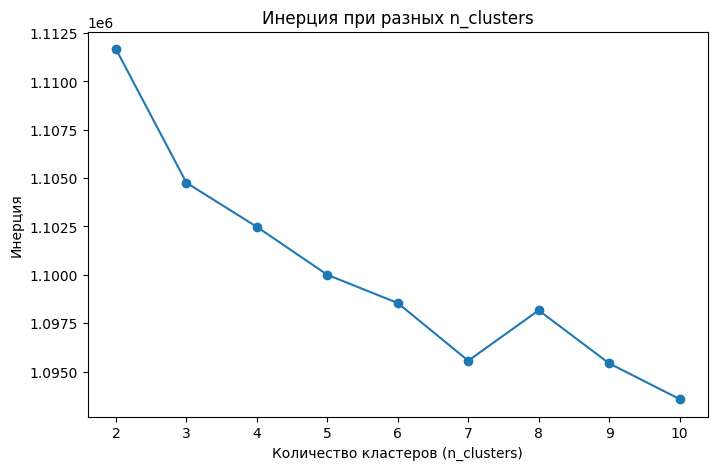

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_range, kmeans_inertia, marker='o')
plt.title("Инерция при разных n_clusters")
plt.xlabel("Количество кластеров (n_clusters)")
plt.ylabel("Инерция")
plt.show()


Принцип работы:
*   Разделяет данные на кластеры, минимизируя сумму расстояний от точек до центров кластеров.

Результаты:

*   График инерции показал снижение при увеличении числа кластеров, что помогает выбрать оптимальное значение n_clusters (например, с помощью метода "локтя").

*   Метод хорошо работает с большими наборами данных и сферически распределенными кластерами.

*   Проблемы могут возникнуть, если данные имеют сложную форму или разную плотность кластеров.

Кластеры:
*   Четкое разделение данных на заданное число кластеров.
Подходит для вашего набора данных после нормализации.


In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


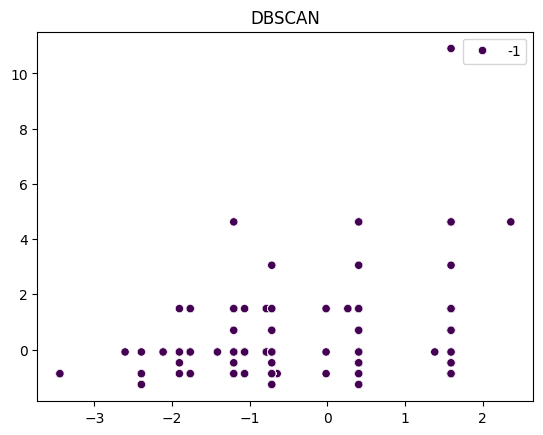

In [40]:
import seaborn as sns
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title("DBSCAN")
plt.show()


Принцип работы:
*  Обнаруживает кластеры любой формы, основываясь на плотности точек. Точки,
которые не входят ни в один кластер, считаются выбросами.

Результаты:

*  Метод успешно идентифицировал плотные области и выбросы (обозначены как -1).
*  Чувствителен к выбору параметров eps и min_samples.
*  Подходит для данных с нерегулярной формой кластеров, но не справляется с очень высокоразмерными данными.

Кластеры:

*  Количество кластеров может меняться в зависимости от параметров.
Выбросы присутствуют, что указывает на наличие точек, плохо подходящих к основным кластерам.

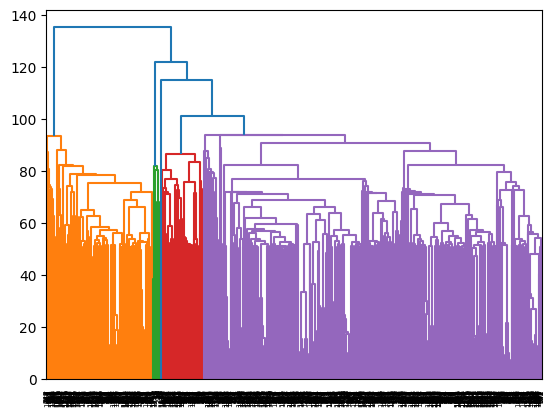

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
clusters = fcluster(Z, t=3, criterion='maxclust')


Иерархическая кластеризация — это метод кластеризации, который строит иерархическую структуру кластеров, часто представляя её в виде дендрограммы. Этот метод позволяет делить данные на кластеры, основываясь на их схожести, и не требует заранее заданного числа кластеров. Он имеет два основных подхода:

Агломеративный подход (снизу вверх) — начинает с того, что каждый объект считается отдельным кластером, а затем последовательно объединяются наиболее схожие кластеры. Этот процесс продолжается до тех пор, пока все объекты не окажутся в одном кластере. Это и есть агломерация.
Дивизионный подход (сверху вниз) — начинается с того, что все объекты находятся в одном кластере, а затем кластер делится на более мелкие, пока не будут достигнуты ожидаемые результаты.

linkage(X_scaled, method='ward'):

X_scaled — это данные, которые предварительно нормализованы (масштабированы).
Метод "Ward" минимизирует суммарную внутрикластерную дисперсию при объединении кластеров, что обычно приводит к наиболее сбалансированным и компактным кластерам.
dendrogram(Z):

Это функция, которая визуализирует дендрограмму, на которой показан процесс объединения кластеров. Каждый раз, когда два кластера объединяются, на графике появляется соединительная линия, длина которой отражает расстояние (или различие) между ними.
fcluster(Z, t=3, criterion='maxclust'):

fcluster используется для выделения кластеров из дендрограммы.
Параметр t=3 говорит, что нужно выделить 3 кластера, независимо от того, сколько объединений произошло в процессе иерархической кластеризации.
criterion='maxclust' означает, что будет ограничено количество кластеров, равное t, и объекты будут разделены таким образом, чтобы было максимум 3 кластера.
В итоге, метод иерархической кластеризации позволяет визуализировать отношения между объектами и выбрать число кластеров в зависимости от дендрограммы или конкретных требований задачи.

**Выводы**

KMeans подходит для большинства случаев, если данные хорошо подготовлены и кластеры имеют равномерную плотность.

DBSCAN полезен для сложных кластеров и обнаружения выбросов, но требует тщательной настройки параметров.

Иерархическая кластеризация — это мощный и гибкий метод, который хорошо подходит для анализа структуры данных и визуализации кластеров. Однако для больших или сильно зашумленных данных могут потребоваться другие методы кластеризации, например, KMeans или DBSCAN.

Для моего датасета KMeans и DBSCAN выглядят предпочтительными методами.